# Basic Python
## Part 1: Logic and String Manipulation

**1.a The DNA Helix Printer**
Write a function `print_helix(n, turns)` where `n` is the width of the helix and `turns` is the number of full cycles. The helix is formed by two strands.
* The strands oscillate using a sine-wave-like pattern.
* The characters for the strands should cycle through `A, C, G, T`.
* **Constraint:** You must handle the spacing dynamically.

**Example Output (`n=4, turns=1`):**
```text
A      A
 C    C
  G  G
   TT
  A  A
 C    C
G      G

In [124]:
def print_helix(n, turns):
    DNA_chars = "ACGT"

    if n <= 0:
        return

    if n == 1:
        for _ in range(turns):
            print("AA")
        return

    total_print_width = 2 * (n - 1) + 2
    period = 2 * (n - 1)
    lines = turns * period + 1

    for row_num in range(lines):
        idx = row_num % 4
        curr = DNA_chars[idx]
        curr_pos = row_num % period
        if curr_pos < n:
            pos_left = curr_pos
        else:
            pos_left = period - curr_pos
        right_pos = total_print_width - 1 - pos_left
        line_chars = [' '] * total_print_width
        line_chars[pos_left] = curr
        line_chars[right_pos] = curr
        print("".join(line_chars))

# Test
print_helix(4, 1)

A      A
 C    C 
  G  G  
   TT   
  A  A  
 C    C 
G      G


**1.b The Custom Sorter**
Write a function `sort_strings(s_list)` that takes a list of strings and sorts them based on the following priority rules:
1.  **Primary:** Length of the string (Ascending).
2.  **Secondary:** Number of distinct vowels (a, e, i, o, u) present in the string (Descending).
3.  **Tertiary:** Alphabetical order (Ascending).

**Example:**
Input: `["apple", "banana", "kiwi", "sky", "aieou", "z"]`
Output: `['z', 'sky', 'kiwi', 'aieou', 'apple', 'banana']`

In [125]:
def sort_strings(s_list):
    VOWELS = {'a', 'e', 'i', 'o', 'u'}

    def count_distinct_vowels(s):
        return len(VOWELS.intersection(set(s.lower())))
    return sorted(s_list, key=lambda s: (len(s), -count_distinct_vowels(s), s))

# Test
data = ["apple", "banana", "kiwi", "sky", "aieou", "z"]
print(sort_strings(data))

['z', 'sky', 'kiwi', 'aieou', 'apple', 'banana']


## Part 2: Working with Data

Consider that you are processing raw data from a sensor in a physics lab. The sensor is noisy and occasionally malfunctions.

**Task:**
1.  Read the file ```sensor_logs.csv``` **without using Pandas**.
2.  **Filter:** Ignore rows where `status` is "ERR" OR `voltage` > 10.0.
3.  **Analysis:** Calculate the **Mean** and **Standard Deviation** for each sensor.

In [126]:
import math
import csv
from collections import defaultdict

def analyze_sensors(filename):
    sensor_data = defaultdict(list)

    with open(filename, 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            try:
                voltage = float(row['voltage'])
                status = row['status']
                sensor_id = row['sensor_id']
                if status == "ERR" or voltage > 10.0:
                    continue
                sensor_data[sensor_id].append(voltage)
            except ValueError as e:
                print(f"Data conversion error: {row} - {e}")
                continue
            except KeyError as e:
                print(f"missing column: {row} - {e}")
                continue
    results = {}
    for sensor_id, readings in sensor_data.items():
        if not readings:
            continue
        mean = sum(readings) / len(readings)
        if len(readings) > 1:
            variance = sum([(x - mean) ** 2 for x in readings]) / len(readings)
            std_dev = math.sqrt(variance)
        else:
            std_dev = 0.0
        results[sensor_id] = {"mean": mean, "std_dev": std_dev}

    return results

# Test with the provided filename
analysis_results = analyze_sensors("sensor_log.csv")
for sensor_id, stats in analysis_results.items():
    print(f"Sensor: {sensor_id}, Mean Reading: {stats['mean']:.2f}, Standard Deviation: {stats['std_dev']:.2f}")

Sensor: S3, Mean Reading: 3.93, Standard Deviation: 0.58
Sensor: S1, Mean Reading: 4.03, Standard Deviation: 0.54
Sensor: S2, Mean Reading: 4.06, Standard Deviation: 0.58
Sensor: S4, Mean Reading: 3.97, Standard Deviation: 0.58


## SciPy

### Task 1

Find the positive root of the transcendental equation: $x^2 - 5\sin(x) - 2 = 0$

In [127]:
import numpy as np
from scipy.optimize import fsolve

def func(x):
    return x**2 - 5 * np.sin(x) - 2
initial_guess = 2.5
positive_root = fsolve(func, initial_guess)

print(f"The positive root of the equation is: {positive_root[0]:.4f}")

The positive root of the equation is: 2.3542


### Task 2
Simulate a radioactive decay chain: $A \to B \to C$ (Stable).

* $\frac{dA}{dt} = -k_1 A$
* $\frac{dB}{dt} = k_1 A - k_2 B$
* $\frac{dC}{dt} = k_2 B$

Given $k_1 = 0.5$, $k_2 = 0.1$. Initial conditions: $A_0 = 100$, $B_0 = 0$, $C_0 = 0$.

You have to find the concentration of **B at t = 5.0**.

The concentration of B at t = 5.0 is: 65.5557


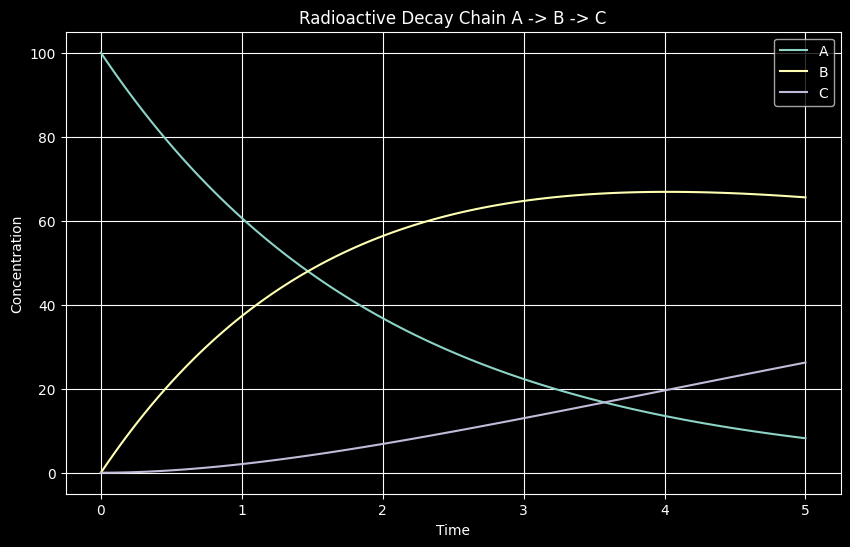

In [128]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def decay_ode(y, t, k1, k2):
    A, B, C = y
    dAdt = -k1 * A
    dBdt = k1 * A - k2 * B
    dCdt = k2 * B
    return [dAdt, dBdt, dCdt]

k1 = 0.5
k2 = 0.1

y0 = [100, 0, 0]

t = np.linspace(0, 5, 100)

sol = odeint(decay_ode, y0, t, args=(k1, k2))

sol_at_5 = odeint(decay_ode, y0, [0, 5.0], args=(k1, k2))
B_at_t5 = sol_at_5[-1, 1]

print(f"The concentration of B at t = 5.0 is: {B_at_t5:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(t, sol[:, 0], label='A')
plt.plot(t, sol[:, 1], label='B')
plt.plot(t, sol[:, 2], label='C')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Radioactive Decay Chain A -> B -> C')
plt.legend()
plt.grid(True)
plt.show()

# The N-Body Problem
In classical mechanics, the Two-Body problem (e.g., Earth-Moon) has an analytical solution. However, adding a third body makes the system unsolvable by pen and paper. To predict the motion of star clusters or galaxies, we solve the **N-Body problem** numerically.

**Objective:** Your task is to implement a vectorized N-Body simulation using Python and NumPy.

**Important: You are not allowed to use any loops for physics calculations.**

### The Physics & The Numerical Problem

The acceleration $\vec{a}_i$ acting on particle $i$ is the sum of gravitational forces from all other particles $j$.
$$\vec{a}_i = \sum_{j \neq i} G \cdot m_j \cdot \frac{\vec{r}_j - \vec{r}_i}{|\vec{r}_j - \vec{r}_i|^3}$$

**The Numerical Issue:**
As particles get close, $|\vec{r}_j - \vec{r}_i| \to 0$, causing the force to shoot to infinity (Singularity). In a discrete time-step simulation, this flings particles out of the galaxy at unphysical speeds.

**Q. Explain, how would you overcome this issue (you may introduce additional parameters if needed)?**

**Q. Does the value of your param ```affect``` your results? If they do then explain how.**

### Setup and Initialization

Run this cell to import libraries and set up the simulation environment. **Do not modify this cell.**

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Simulation Parameters

G = 1.0           # Gravitational Constant
PARAM = 0.1       # Your parameter (if needed)
DT = 0.01         # Time step
STEPS = 200       # Number of steps
N_PARTICLES = 100 # Number of particles

def generate_initial_state(N, seed=42):
    """
    Generates N random particles.
    Returns:
        positions: (N, 2) array
        velocities: (N, 2) array
        masses: (N,) array
    """
    np.random.seed(seed)
    positions = np.random.randn(N, 2)
    velocities = np.random.randn(N, 2) * 0.5
    masses = np.random.rand(N) + 0.5 # Masses between 0.5 and 1.5
    return positions, velocities, masses

In [130]:
# TODO 1 : Calculates the net acceleration on every particle due to every other particle.
# You should return accelerations as a (N, 2) numpy array representing a_x, a_y

def calculate_accelerations(positions, masses, G=1.0, param=0.1):
    N = positions.shape[0]

    # TODO 1.1: Calculate the displacement vector matrix (N, N, 2)
    displacement_vectors = positions[np.newaxis, :, :] - positions[:, np.newaxis, :]

    # TODO 1.2: Calculate the distance squared matrix (N, N)
    distance_squared = np.sum(displacement_vectors**2, axis=2)
    r_cubed_inv = (distance_squared + param**2)**(-1.5)
    np.fill_diagonal(r_cubed_inv, 0)

    # TODO 1.3: Find the acceleration (N, 2)
    mass_factor = G * masses[np.newaxis, :] * r_cubed_inv
    accelerations_per_pair = mass_factor[:, :, np.newaxis] * displacement_vectors
    total_accelerations = np.sum(accelerations_per_pair, axis=1)

    return total_accelerations

In [131]:
# TODO 2: Updates the simulation by one timestep.

def symplectic_euler_step(positions, velocities, accelerations, dt):
    # TODO 2.1: Update velocities and then positions using the formulas above.
    velocities += accelerations * dt
    positions += velocities * dt
    return positions, velocities

## Visualization

If your code is correct, this block will run the simulation and produce a plot.

**Note:** This block checks if your functions are implemented. If they return `None` or zeros, the plot will look static or empty.

Simulation of 100 particles for 200 steps took: 0.0957s


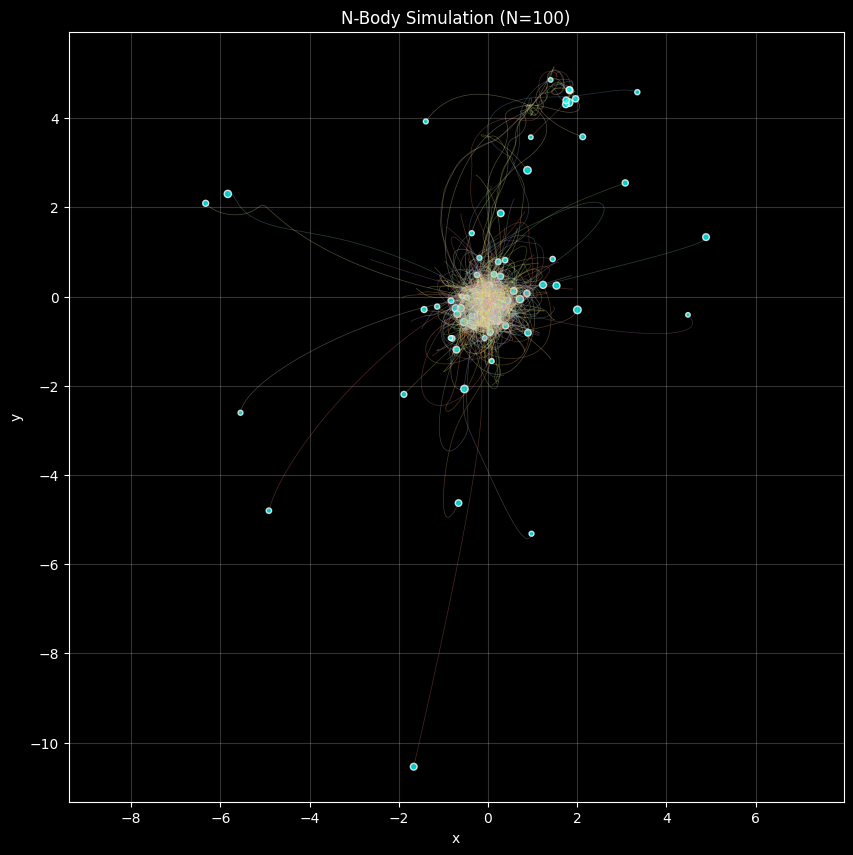

In [132]:
def run_simulation(N=100, steps=200, dt=0.01):
    positions, velocities, masses = generate_initial_state(N)
    trajectory_history = []
    trajectory_history.append(positions.copy())
    start_time = time.time()
    for _ in range(steps):
        acc = calculate_accelerations(positions, masses, G, PARAM)
        positions, velocities = symplectic_euler_step(positions, velocities, acc, dt)
        trajectory_history.append(positions.copy())

    end_time = time.time()
    print(f"Simulation of {N} particles for {steps} steps took: {end_time - start_time:.4f}s")

    return np.array(trajectory_history), masses

# Main Simualtion
history, masses = run_simulation(N=N_PARTICLES, steps=STEPS, dt=DT)

plt.figure(figsize=(10, 10))
plt.style.use('dark_background')

for i in range(N_PARTICLES):
    plt.plot(history[:, i, 0], history[:, i, 1], alpha=0.3, lw=0.5)

# Plot final positions
plt.scatter(history[-1, :, 0], history[-1, :, 1], s=masses*20, c='cyan', alpha=0.8, edgecolors='white')

plt.title(f"N-Body Simulation (N={N_PARTICLES})")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.2)
plt.axis('equal')
plt.show()

## Conservation of Energy

A good physics simulation must conserve energy.
* **Kinetic Energy (T):** $T = \frac{1}{2} \sum m_i v_i^2$
* **Potential Energy (U):** $U = -\frac{1}{2} \sum_i \sum_{j \neq i} \frac{G m_i m_j}{r_{ij}}$

**Note that the energy functions can also change depending on how you chose the parameter, so if you make any such modification, explain that clearly.**

**Task:** Implement the energy calculation.

In [141]:
# TODO 3: Calculate the Total Energy (Kinetic + Potential).

def calculate_total_energy(positions, velocities, masses, G=1.0, param=0.1):
    N = positions.shape[0]

    # TODO 3.1: Calculate Kinetic Energy
    kinetic_energy_per_particle = 0.5 * masses * np.sum(velocities**2, axis=1)
    T = np.sum(kinetic_energy_per_particle)

    # TODO 3.2: Calculate Potential Energy
    displacement_vectors = positions[np.newaxis, :, :] - positions[:, np.newaxis, :]
    distance_squared = np.sum(displacement_vectors**2, axis=2)
    r_ij_softened = np.sqrt(distance_squared + param**2)
    mass_product_matrix = masses[:, np.newaxis] * masses[np.newaxis, :]
    np.fill_diagonal(r_ij_softened, np.inf) # This makes 1/r_ij_softened -> 0 for diagonal
    term_matrix = G * mass_product_matrix / r_ij_softened
    U = -0.5 * np.sum(term_matrix)
    return T + U

# Test for a simple 2-body static case
pos_test = np.array([[1.0, 0.0], [-1.0, 0.0]])
vel_test = np.array([[0.0, 0.0], [0.0, 0.0]])
mass_test = np.array([1.0, 1.0])

# Test with param=0.0 to match the analytical expectation for point masses
E_check = calculate_total_energy(pos_test, vel_test, mass_test, G=1.0, param=0.0)
print(f"Test Case Energy: {E_check:.4f} (Expected: -0.500)")

Test Case Energy: -0.5000 (Expected: -0.500)


## Advanced Integration with SciPy

In computational physics, we often use established libraries to verify our manual implementations. SciPy's `solve_ivp` is a powerful integrator with adaptive time-stepping.

**The Challenge:** `solve_ivp` requires the system state to be a **1D array**. You currently have 2D arrays for positions and velocities.

**TODO:**
1.  Flatten your initial `positions` and `velocities` into a single 1D array `y0`.
2.  Implement the derivative function `nbody_ode(t, y, masses, ...)` which:
    * Unpacks the 1D `y` back into `positions` and `velocities`.
    * Calculates `accelerations` using your function from Task 1.
    * Returns the derivatives (velocities and accelerations) as a flattened 1D array.
3.  Run the solver.

## 8. Task 4: Advanced Integration with SciPy

In computational physics, we often use established libraries to verify our manual implementations. SciPy's `solve_ivp` is the industry standard for solving ODEs.

But `solve_ivp` requires the system state to be a **single 1D array**, but your physics simulation uses separate 2D arrays for position and velocity.

**Task:**
2.  Run the simulation using `solve_ivp`.

In [142]:
from scipy.integrate import solve_ivp

# TODO 4: Implement a function nbody_ode that bridges the gap between scipy 1D requirement and your 2D logic.

def nbody_ode(t, y, masses, G, param):
    """
    This function takes in
        t: float, current time
        y: 1D numpy array, current state vector (positions and velocities flattened)
        masses: (N,) array
        G: float
        param: float (softening parameter)

    This should return an array (dydt) i.e.
        1D numpy array, which time derivative of the state vector
    """
    N = len(masses)
    # TODO 4.1: Unpack the 1D state vector 'y' into positions (N, 2) and velocities (N, 2)
    positions = y[:2*N].reshape(N, 2)
    velocities = y[2*N:].reshape(N, 2)

    # TODO 4.2: Calculate accelerations
    accelerations = calculate_accelerations(positions, masses, G, param)

    # TODO 4.3: Pack the derivatives (velocities and accelerations) back into a 1D array
    dydt = np.concatenate((velocities.flatten(), accelerations.flatten()))

    return dydt

Running SciPy Integrator for N=10...
SciPy solved in 63 steps.
Final shape of solution: (40, 63)


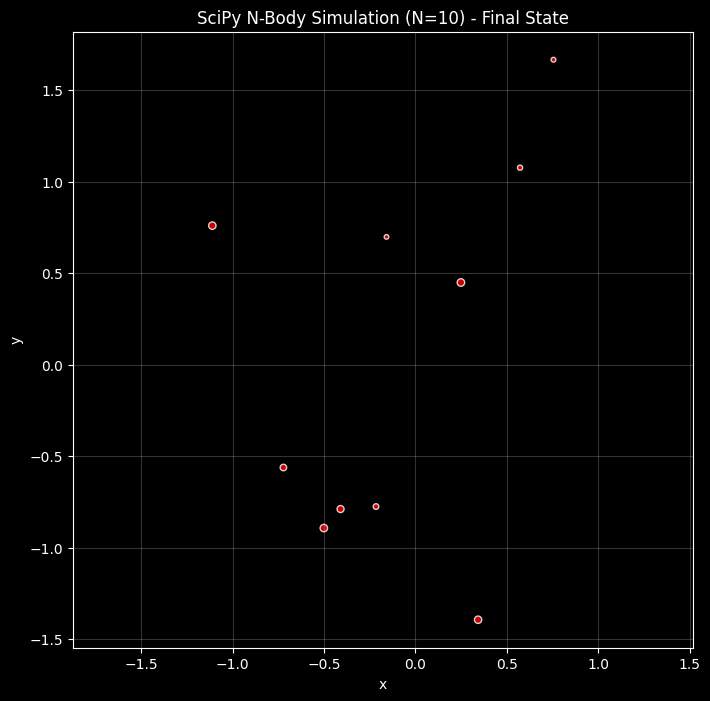

In [143]:
# TODO 5: Run the simulation using solve_ivp.

N_SCIPY = 10
pos_s, vel_s, mass_s = generate_initial_state(N_SCIPY)
t_span = (0, 2.0)
print(f"Running SciPy Integrator for N={N_SCIPY}...")

# TODO 5.1: Prepare the initial 1D state vector 'y0' from pos_s and vel_s
y0_scipy = np.concatenate((pos_s.flatten(), vel_s.flatten()))

# TODO 5.2: Call solve_ivp
sol = solve_ivp(fun=nbody_ode, t_span=t_span, y0=y0_scipy, args=(mass_s, G, PARAM), method='RK45', dense_output=True)

if sol:
    print(f"SciPy solved in {len(sol.t)} steps.")
    print(f"Final shape of solution: {sol.y.shape}")

final_positions_scipy = sol.y[:2*N_SCIPY, -1].reshape(N_SCIPY, 2)
plt.figure(figsize=(8, 8))
plt.scatter(final_positions_scipy[:, 0], final_positions_scipy[:, 1], s=mass_s*20, c='red', alpha=0.8, edgecolors='white')
plt.title(f"SciPy N-Body Simulation (N={N_SCIPY}) - Final State")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.2)
plt.axis('equal')
plt.show()

# Damped coupled oscillators

The bobs of two pendulums are connected by a spring, forming a coupled oscillator system. Real systems always have some damping, in which mechanical energy is slowly converted to heat. For this problem we model the damping as a force proportional to velocity. Assume that the spring is ideal and that the system is placed on the surface of an unknown extremely large planet. Let $\theta_1$ and $\theta_2$ denote the angles that pendulum strings make with the vertical and $t$ denote time. The equations governing the motion of the system can be written as

$$ \frac{d^2 \theta_1}{d t^2} = -c_1 \frac{d \theta_1}{d t} - k_1 \theta_1 -k_c (\theta_1 - \theta_2)$$
$$ \frac{d^2 \theta_2}{d t^2} = -c_2 \frac{d \theta_2}{d t} - k_2 \theta_2 -k_c (\theta_2 - \theta_1)$$

The file `data.csv` provides you measurements for $\theta_1$ and $\theta_2$ with time. Your task is to find $c_1, c_2, k_1, k_2, k_c$ using python (numpy and/or pandas). Note that the data might have noise and also be partially corruped due to limitations of measuring instruments.  Plot the values of $\theta_1$ and $\theta_2$ predicted using the constants calculated above against the measured values. Assume arbitrary (but consistent) unit system.

Data loaded successfully.

Fitted Parameters:
c1 = 21.4043
c2 = 52.7086
k1 = 74.4039
k2 = 71.9094
kc = 16.0531


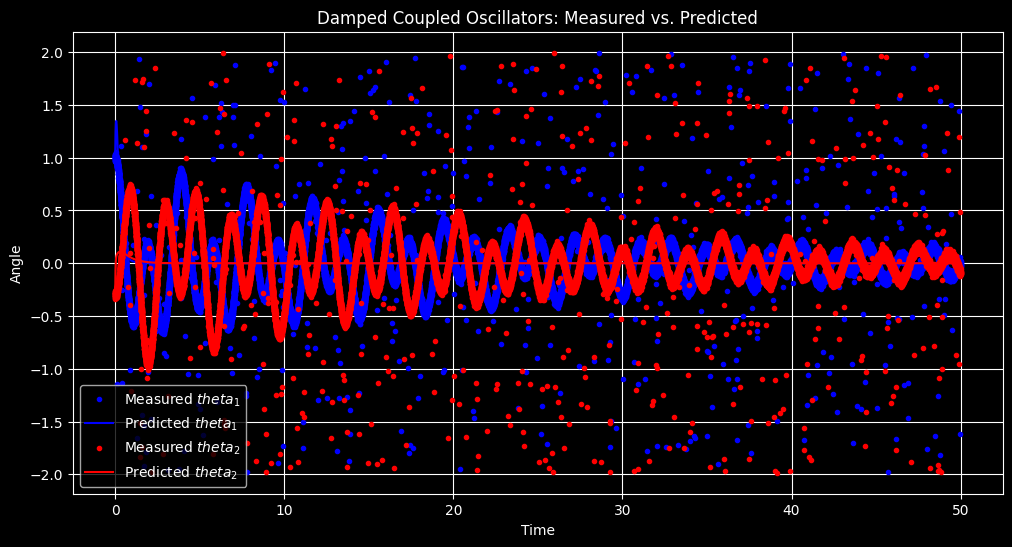

In [147]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('data.csv')
    print("Data loaded successfully.")
    time_data = df['t'].values
    theta1_data = df['theta_1'].values
    theta2_data = df['theta_2'].values
except FileNotFoundError:
    print("Error: data.csv not found!!!")

def coupled_oscillators_ode(y, t, c1, c2, k1, k2, kc):
    theta1, dtheta1_dt, theta2, dtheta2_dt = y

    d2theta1_dt2 = -c1 * dtheta1_dt - k1 * theta1 - kc * (theta1 - theta2)
    d2theta2_dt2 = -c2 * dtheta2_dt - k2 * theta2 - kc * (theta2 - theta1)

    return [dtheta1_dt, d2theta1_dt2, dtheta2_dt, d2theta2_dt2]

def integrate_oscillators(time_points, c1, c2, k1, k2, kc):
    initial_theta1 = theta1_data[0]
    initial_dtheta1_dt = (theta1_data[1] - theta1_data[0]) / (time_data[1] - time_data[0]) if len(theta1_data) > 1 else 0.0
    initial_theta2 = theta2_data[0]
    initial_dtheta2_dt = (theta2_data[1] - theta2_data[0]) / (time_data[1] - time_data[0]) if len(theta2_data) > 1 else 0.0

    y0 = [initial_theta1, initial_dtheta1_dt, initial_theta2, initial_dtheta2_dt]

    sol = odeint(coupled_oscillators_ode, y0, time_points, args=(c1, c2, k1, k2, kc))

    return np.hstack((sol[:, 0], sol[:, 2]))

initial_guesses = [0.1, 0.1, 1.0, 1.0, 0.5]

combined_measured_data = np.hstack((theta1_data, theta2_data))

try:
    params, covariance = curve_fit(integrate_oscillators, time_data, combined_measured_data, p0=initial_guesses)

    c1_fit, c2_fit, k1_fit, k2_fit, kc_fit = params

    print("\nFitted Parameters:")
    print(f"c1 = {c1_fit:.4f}")
    print(f"c2 = {c2_fit:.4f}")
    print(f"k1 = {k1_fit:.4f}")
    print(f"k2 = {k2_fit:.4f}")
    print(f"kc = {kc_fit:.4f}")

    y0_predicted = [theta1_data[0], (theta1_data[1] - theta1_data[0]) / (time_data[1] - time_data[0]) if len(theta1_data) > 1 else 0.0,
                    theta2_data[0], (theta2_data[1] - theta2_data[0]) / (time_data[1] - time_data[0]) if len(theta2_data) > 1 else 0.0]
    predicted_sol = odeint(coupled_oscillators_ode, y0_predicted, time_data, args=(c1_fit, c2_fit, k1_fit, k2_fit, kc_fit))
    theta1_predicted = predicted_sol[:, 0]
    theta2_predicted = predicted_sol[:, 2]

    plt.figure(figsize=(12, 6))
    plt.plot(time_data, theta1_data, 'b.', label='Measured $theta_1$')
    plt.plot(time_data, theta1_predicted, 'b-', label='Predicted $theta_1$')
    plt.plot(time_data, theta2_data, 'r.', label='Measured $theta_2$')
    plt.plot(time_data, theta2_predicted, 'r-', label='Predicted $theta_2$')
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title('Damped Coupled Oscillators: Measured vs. Predicted')
    plt.legend()
    plt.grid(True)
    plt.show()

except RuntimeError as e:
    print(f"Error during curve fitting: {e}")